In [23]:
import librosa
audio_path = 'audio_test.wav'
x , sr = librosa.load(audio_path)
print(sr)
print(type(x), type(sr))
print(x.shape)
print('')
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
print(type(mfccs))


22050
<class 'numpy.ndarray'> <class 'int'>
(20406,)

(20, 40)
<class 'numpy.ndarray'>


/tmp/ipykernel_31762/1272907144.py:8: FutureWarning: Pass y=[ 0.01348155  0.01802139  0.01482143 ... -0.0445425  -0.03583177
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


In [24]:
audio_path = 'audio_test_long_A.wav'
x , sr = librosa.load(audio_path)
print(sr)
print(type(x), type(sr))
print(x.shape)

22050
<class 'numpy.ndarray'> <class 'int'>
(79968,)


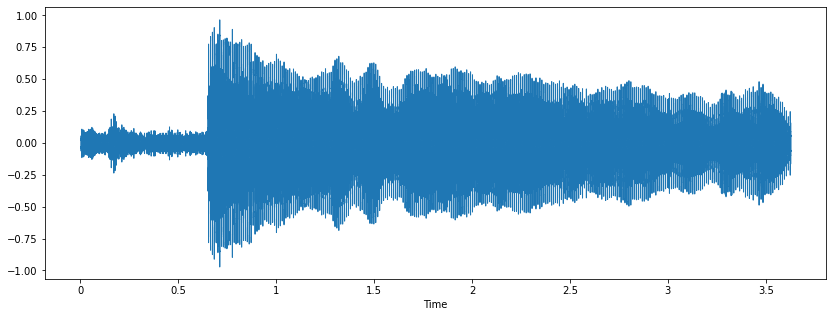

In [25]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

Espectograma:

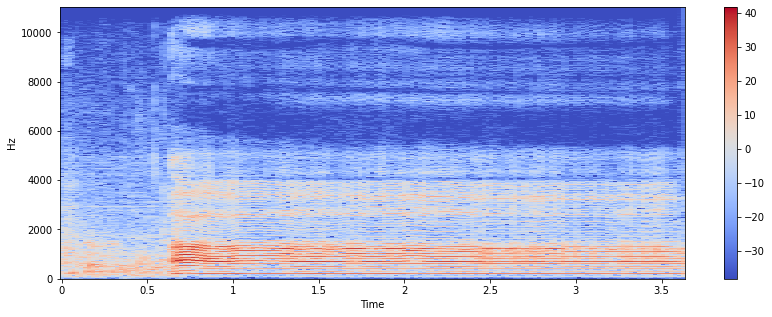

In [26]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Zero-crossing

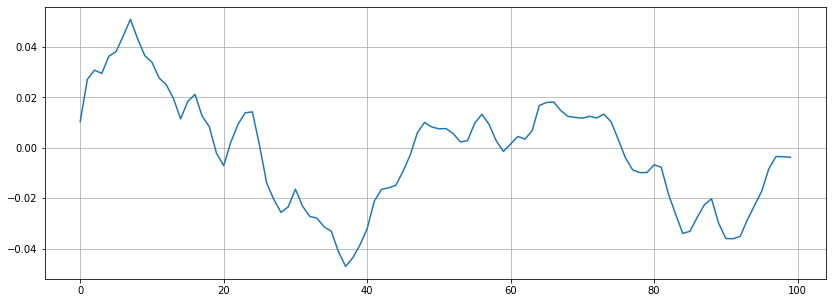

In [27]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [28]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

7


Spectral Centroid

/tmp/ipykernel_31762/819940035.py:3: FutureWarning: Pass y=[0.00221362 0.01099075 0.02111386 ... 0.01006243 0.03693352 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


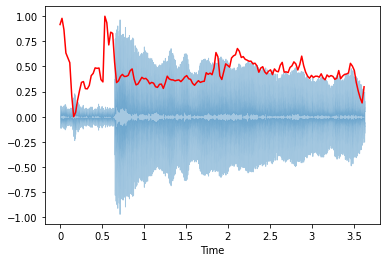

In [29]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

Spectral Rolloff

/tmp/ipykernel_31762/2616464224.py:1: FutureWarning: Pass y=[0.00221362 0.01099075 0.02111386 ... 0.01006243 0.03693352 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]


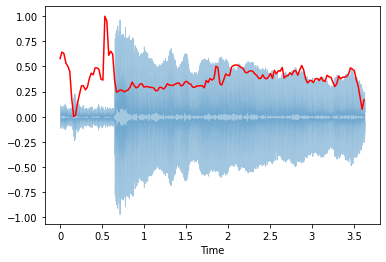

In [30]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

MFCC - Mel-Frequency Cepstral Coefficients

(20, 157)


/tmp/ipykernel_31762/1745963525.py:1: FutureWarning: Pass y=[0.00221362 0.01099075 0.02111386 ... 0.01006243 0.03693352 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


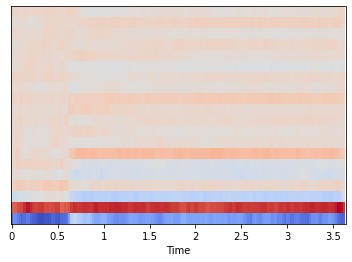

In [35]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')